In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/train.csv",index_col='Id')  # Importing the data
df_test = pd.read_csv("Desktop/test.csv",index_col='Id')  # Importing the data

In [3]:
df = df.sort_index()
df_test = df_test.sort_index()

In [4]:
df.shape

(1168, 80)

In [5]:
df_test.shape

(292, 79)

In [6]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [7]:
df_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
6           50       RL         85.0    14115   Pave   NaN      IR1   
9           50       RM         51.0     6120   Pave   NaN      Reg   
11          20       RL         70.0    11200   Pave   NaN      Reg   
17          20       RL          NaN    11241   Pave   NaN      IR1   
19          20       RL         66.0    13695   Pave   NaN      Reg   

   LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                  ...                                      
6          Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
9          Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
11         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
17         Lvl    AllPub   CulDSac  ...           0        0    NaN    NaN   
19         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

   MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                               
6         Shed     700      10    2009        WD         Normal  
9          NaN       0       4    2008        WD        Abnorml  
11         NaN       0       2    2008        WD         Normal  
17        Shed     700       3    2010        WD         Normal  
19         NaN       0       6    2008        WD         Normal  

[5 rows x 79 columns]

In [8]:
df_comb = pd.concat([df, df_test]) # Combining the two data frame so that we dont have to repeat the same action twice

In [9]:
df_comb.columns # Columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
df_comb.shape # We have total 1460 observations and 80 variables

(1460, 80)

In [11]:
df_comb.info() # Checkign data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1456
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
df_comb.nunique() # Counting the unique classes  in each column

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 80, dtype: int64

In [13]:
df_comb.isnull().sum() # Checking for null values, look like we have some. I will take care of this in a later step.

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 80, dtype: int64

<Figure size 432x288 with 0 Axes>

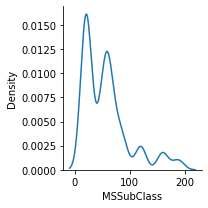

<Figure size 432x288 with 0 Axes>

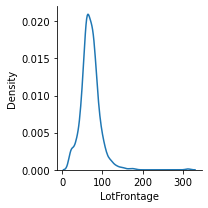

<Figure size 432x288 with 0 Axes>

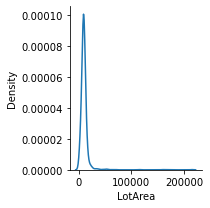

<Figure size 432x288 with 0 Axes>

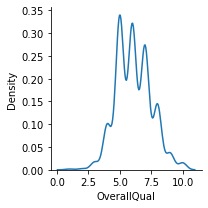

<Figure size 432x288 with 0 Axes>

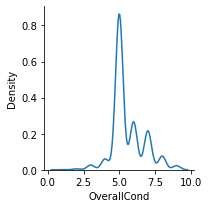

<Figure size 432x288 with 0 Axes>

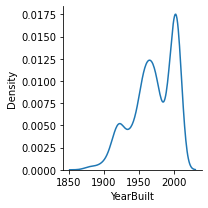

<Figure size 432x288 with 0 Axes>

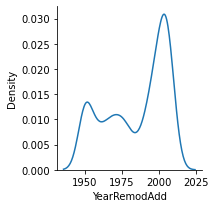

<Figure size 432x288 with 0 Axes>

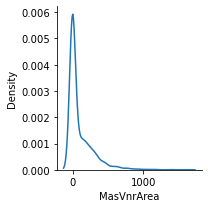

<Figure size 432x288 with 0 Axes>

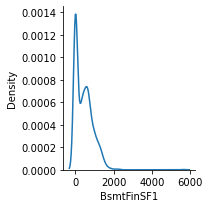

<Figure size 432x288 with 0 Axes>

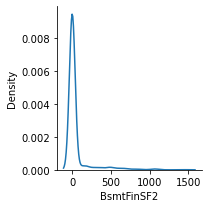

<Figure size 432x288 with 0 Axes>

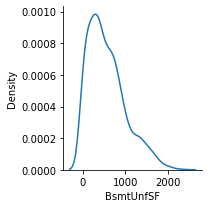

<Figure size 432x288 with 0 Axes>

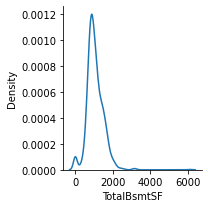

<Figure size 432x288 with 0 Axes>

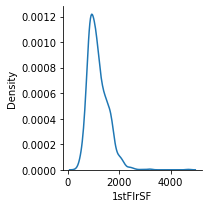

<Figure size 432x288 with 0 Axes>

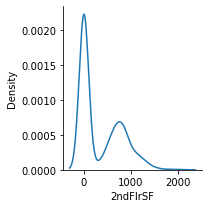

<Figure size 432x288 with 0 Axes>

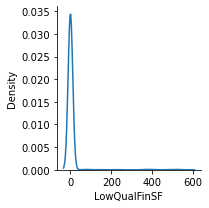

<Figure size 432x288 with 0 Axes>

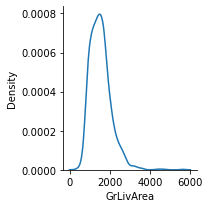

<Figure size 432x288 with 0 Axes>

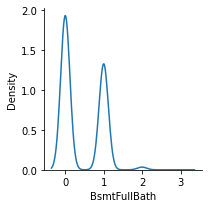

<Figure size 432x288 with 0 Axes>

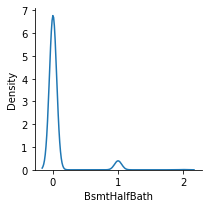

<Figure size 432x288 with 0 Axes>

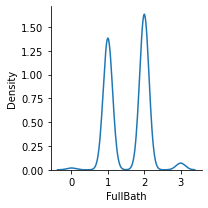

<Figure size 432x288 with 0 Axes>

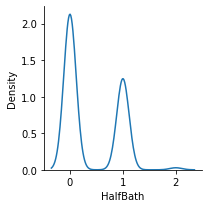

<Figure size 432x288 with 0 Axes>

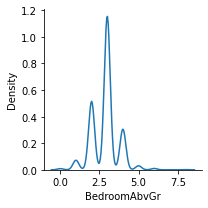

<Figure size 432x288 with 0 Axes>

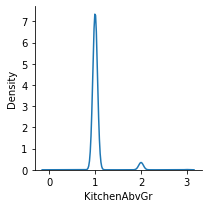

<Figure size 432x288 with 0 Axes>

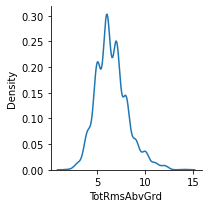

<Figure size 432x288 with 0 Axes>

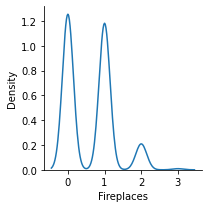

<Figure size 432x288 with 0 Axes>

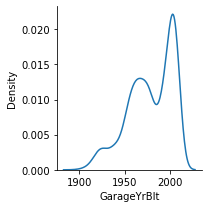

<Figure size 432x288 with 0 Axes>

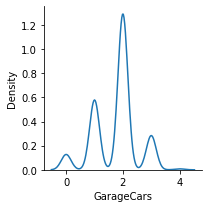

<Figure size 432x288 with 0 Axes>

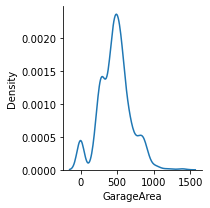

<Figure size 432x288 with 0 Axes>

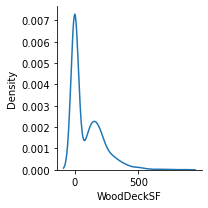

<Figure size 432x288 with 0 Axes>

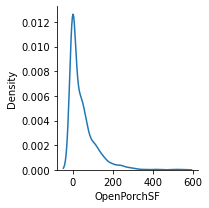

<Figure size 432x288 with 0 Axes>

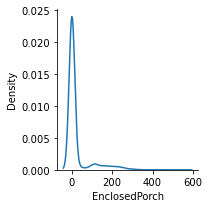

<Figure size 432x288 with 0 Axes>

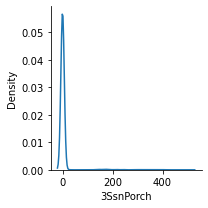

<Figure size 432x288 with 0 Axes>

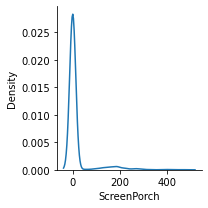

<Figure size 432x288 with 0 Axes>

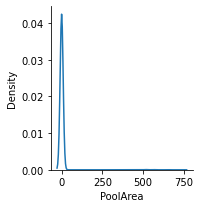

<Figure size 432x288 with 0 Axes>

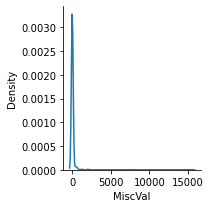

<Figure size 432x288 with 0 Axes>

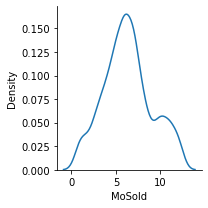

<Figure size 432x288 with 0 Axes>

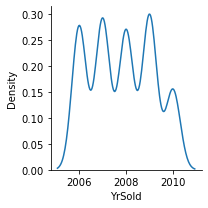

<Figure size 432x288 with 0 Axes>

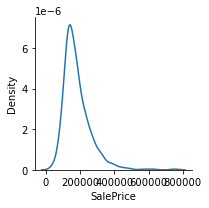

In [14]:
for col in df_comb.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df_comb[col],kind='kde',height=3)
    plt.show()
    
# Checking the distribution of numerical features

In [15]:
numerical_features = df_comb.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

# Defining the list of numerical features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [16]:
categorical_features = df_comb.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

# Defining the list of categorical features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


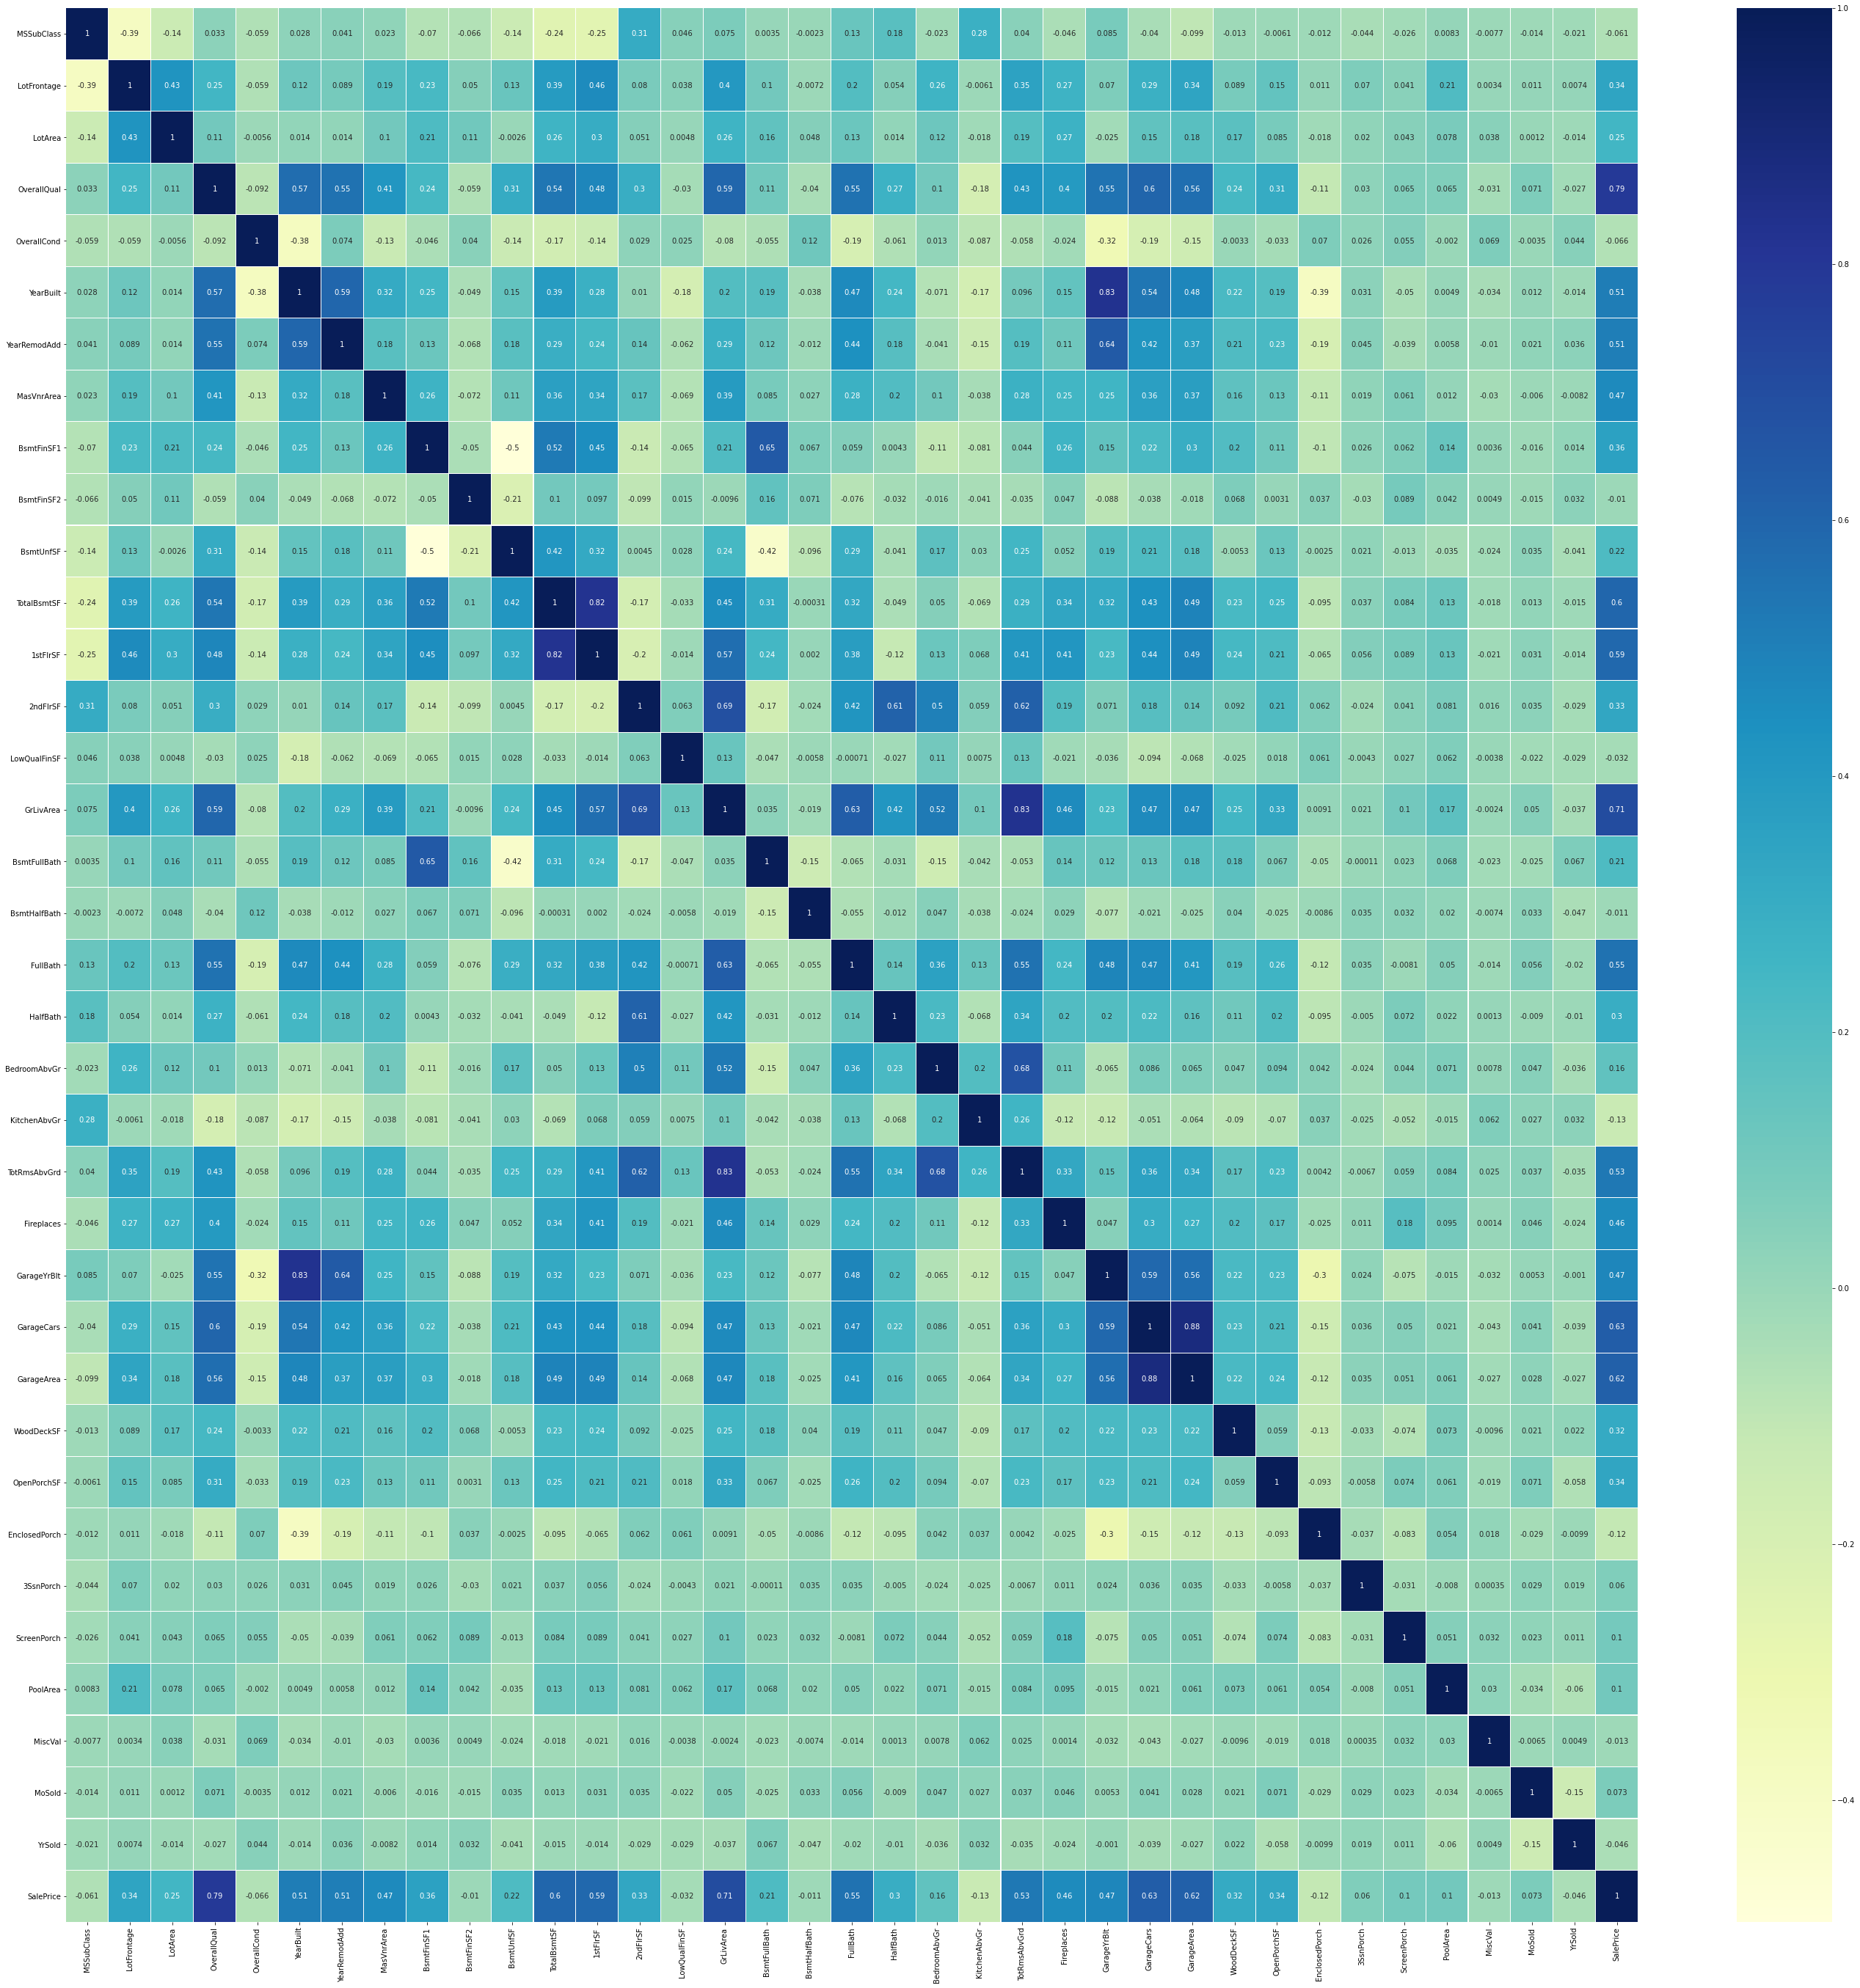

In [17]:
plt.figure(figsize=(48,48))
sns.heatmap(df_comb.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation by plotting heat map

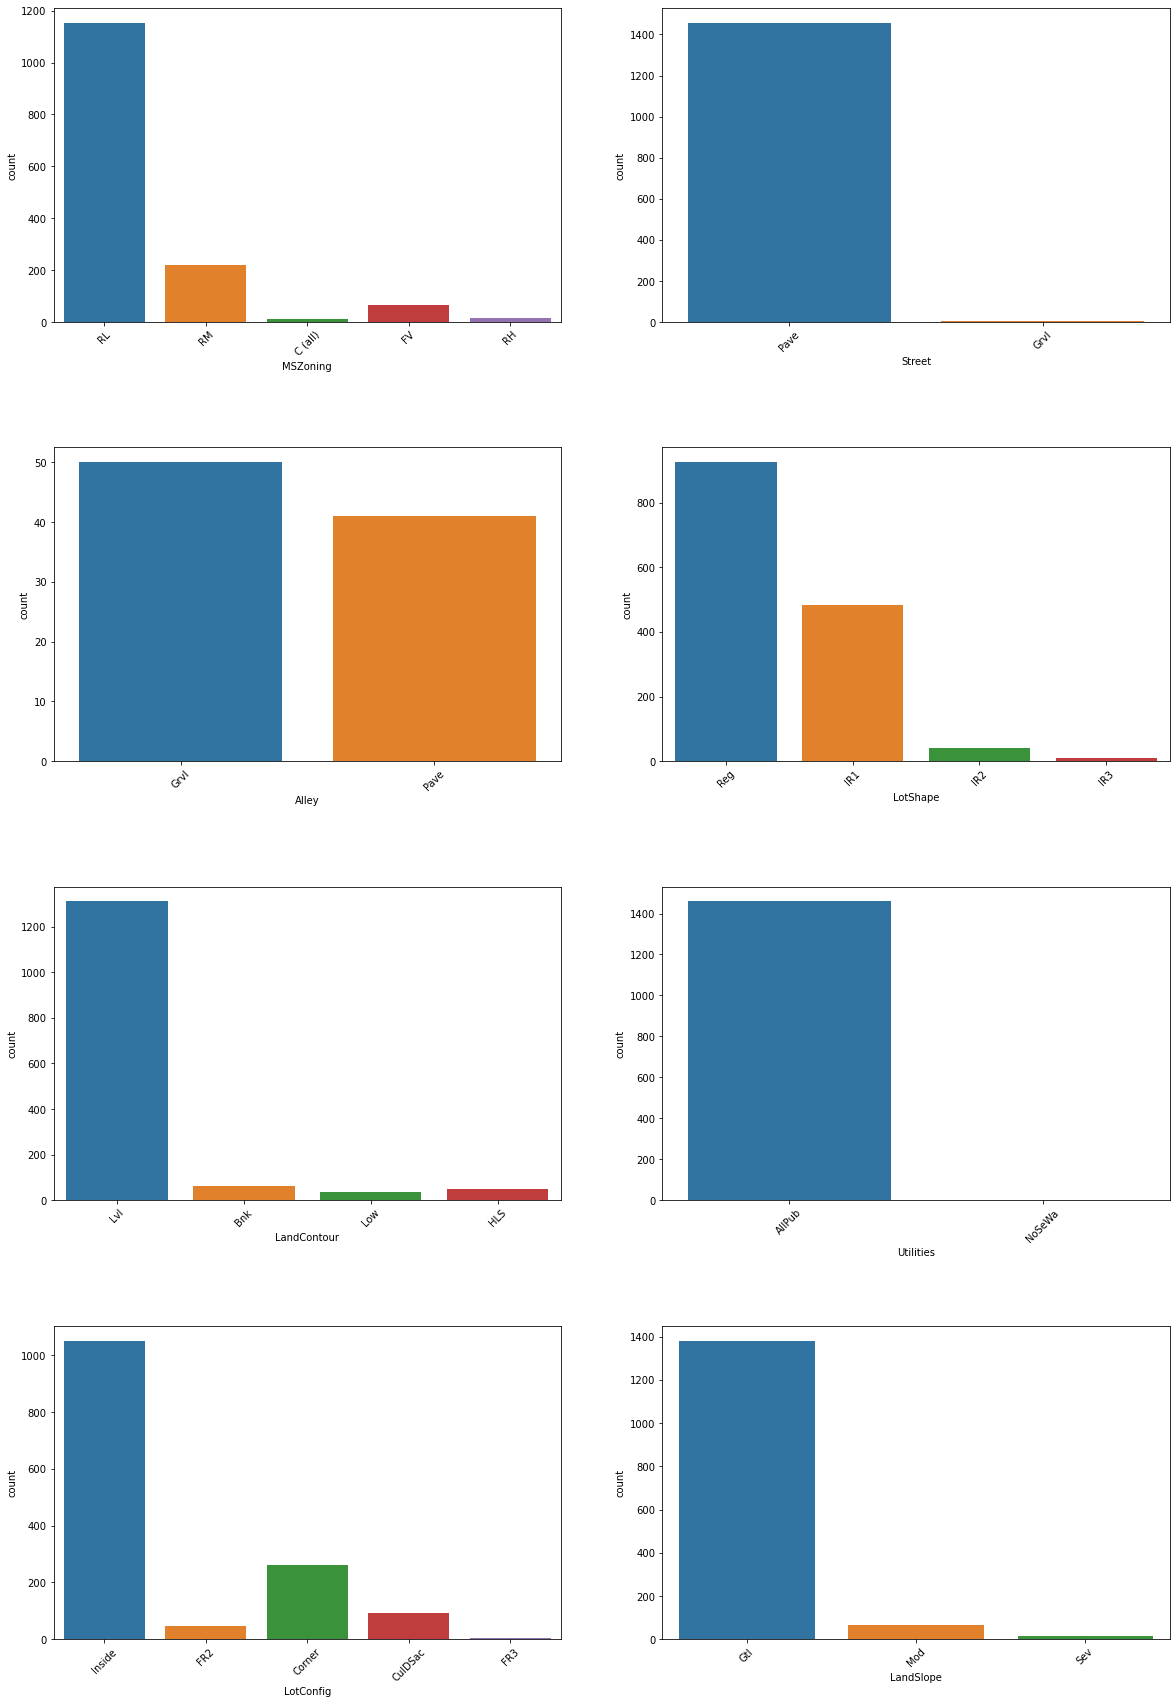

In [18]:
# Plotting the count plot of each categorical variable

fig, ax = plt.subplots(4, 2, figsize=(20, 30))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(data = df_comb, x = categorical_features[variable], ax=subplot)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

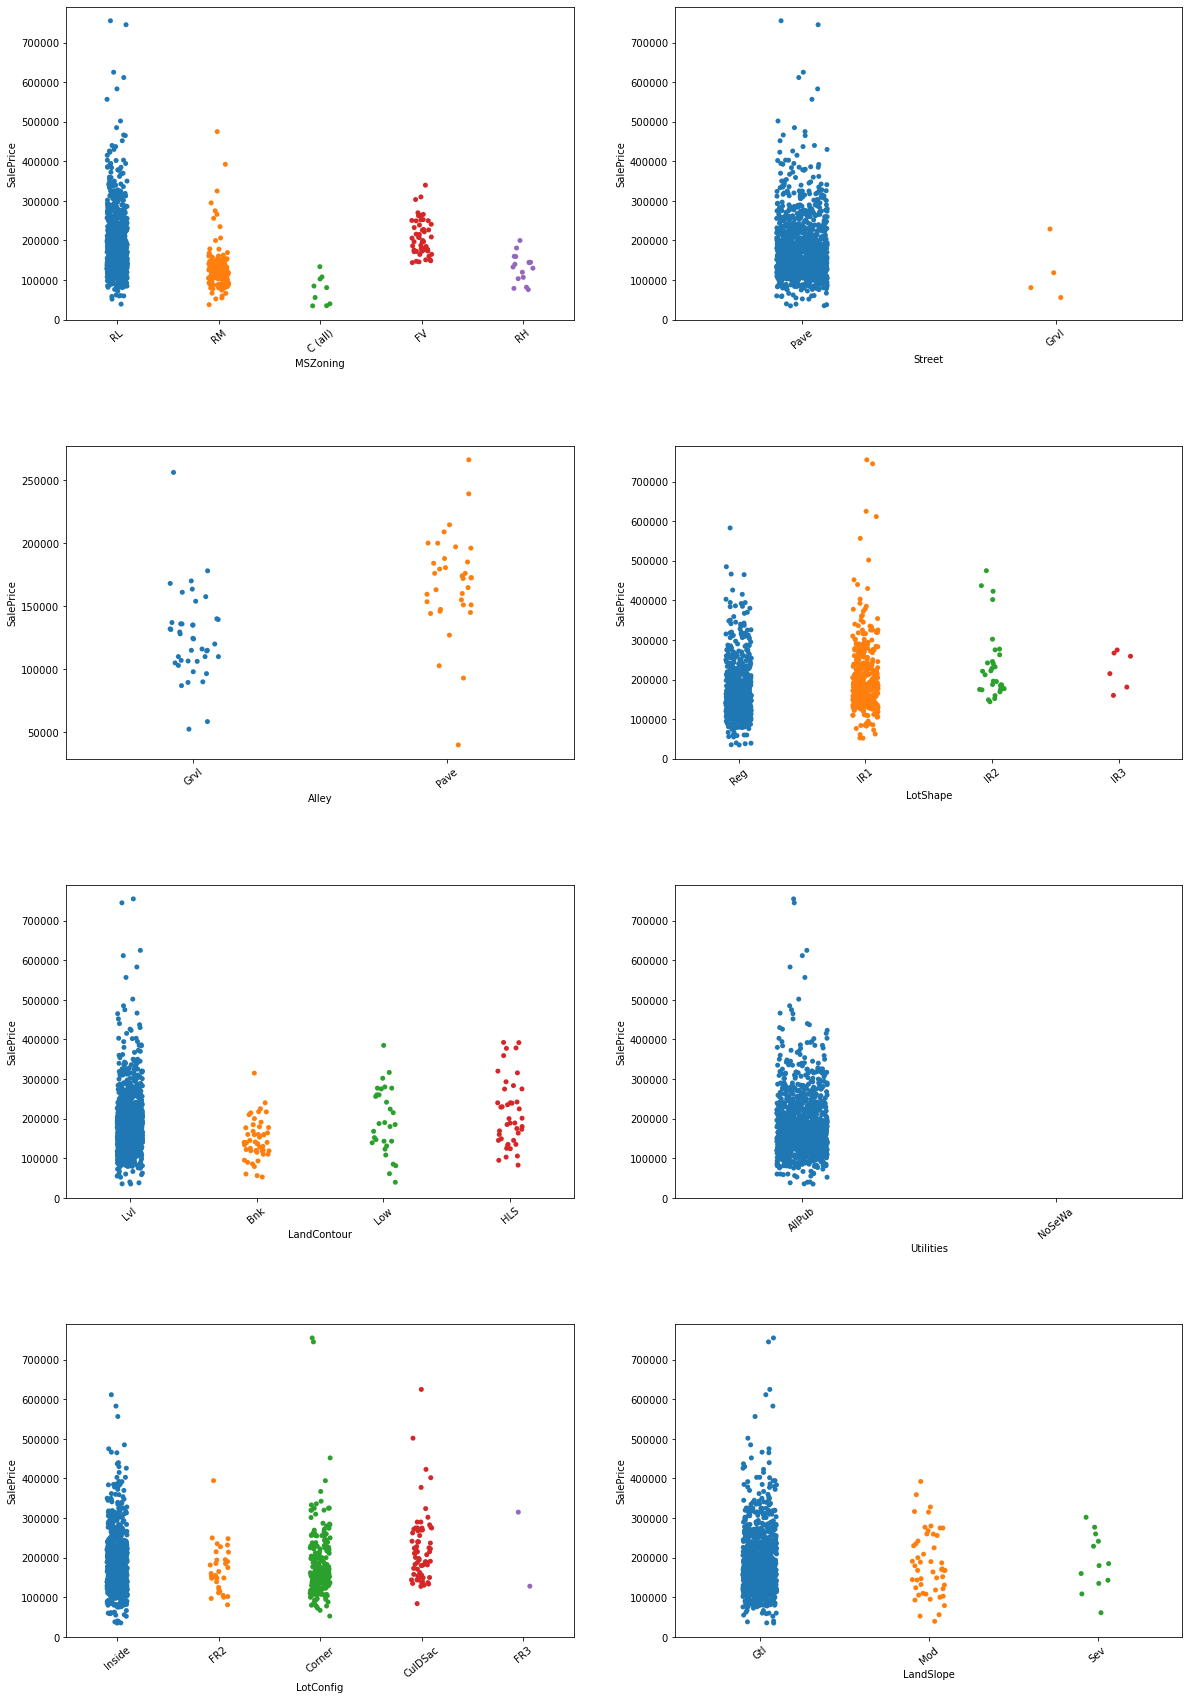

In [19]:
# Strip plot of features

fig, ax = plt.subplots(4, 2, figsize=(20, 30))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.stripplot(x=var, y='SalePrice', data=df_comb, ax=subplot)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    for label in subplot.get_xticklabels():
        label.set_rotation(40)

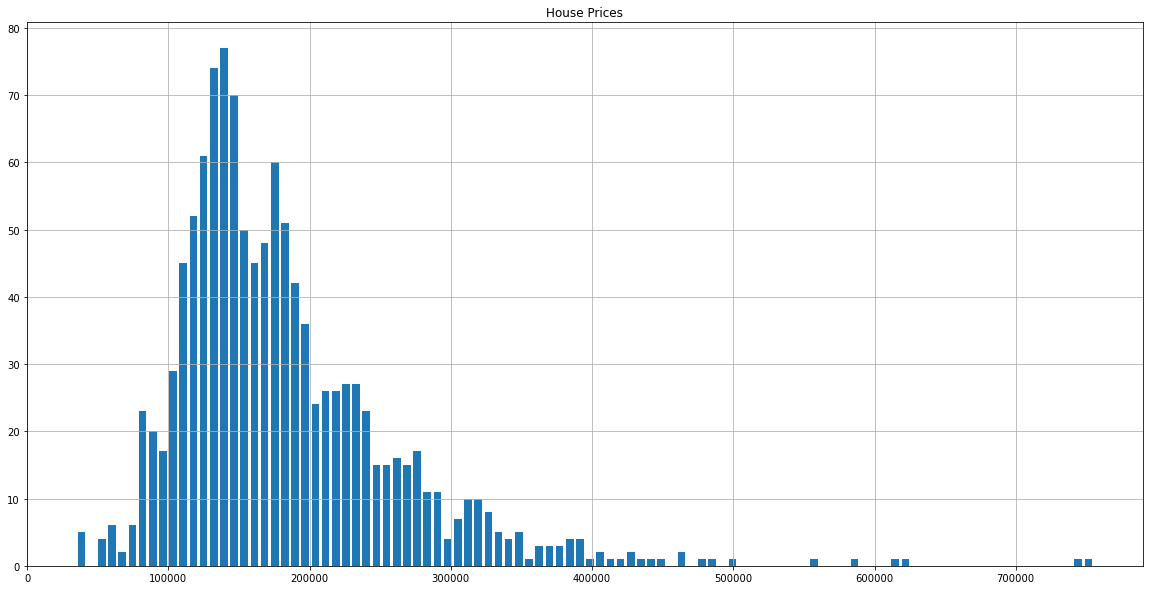

In [20]:
# Looking at distribution of sale price, which is our target variable.
# We can observe that there are two peaks and the distribution is right skewed

df_comb['SalePrice'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('House Prices')
plt.show()

We can observe that most houses are priced between 100k USD and 300k USD

Skew of Sale Price: 1.953877705368287


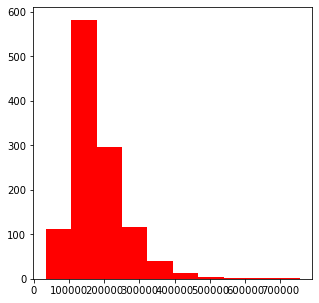

In [21]:
# Checkign mathematical skew of distribution

fig = plt.figure(figsize=(5,5))

print ("Skew of Sale Price:", df_comb.SalePrice.skew())
plt.hist(df_comb.SalePrice,  color='red')
plt.show() # Checking skew of target variable

As we can see we have a high skew of 1.95; we will fix it by taking a log

Skew of Log-Transformed Sale Price 0.073609971994453


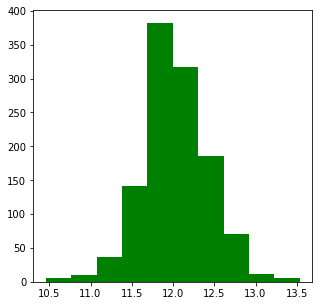

In [22]:
# Checking skew if we take log

fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Sale Price", np.log1p(df_comb.SalePrice).skew())
plt.hist(np.log1p(df_comb.SalePrice), color='green')
plt.show() # Fixing the skew by taking log

We now have a skew of only 0.07 which is great. I'll be using the log transformed data in the final ML model.

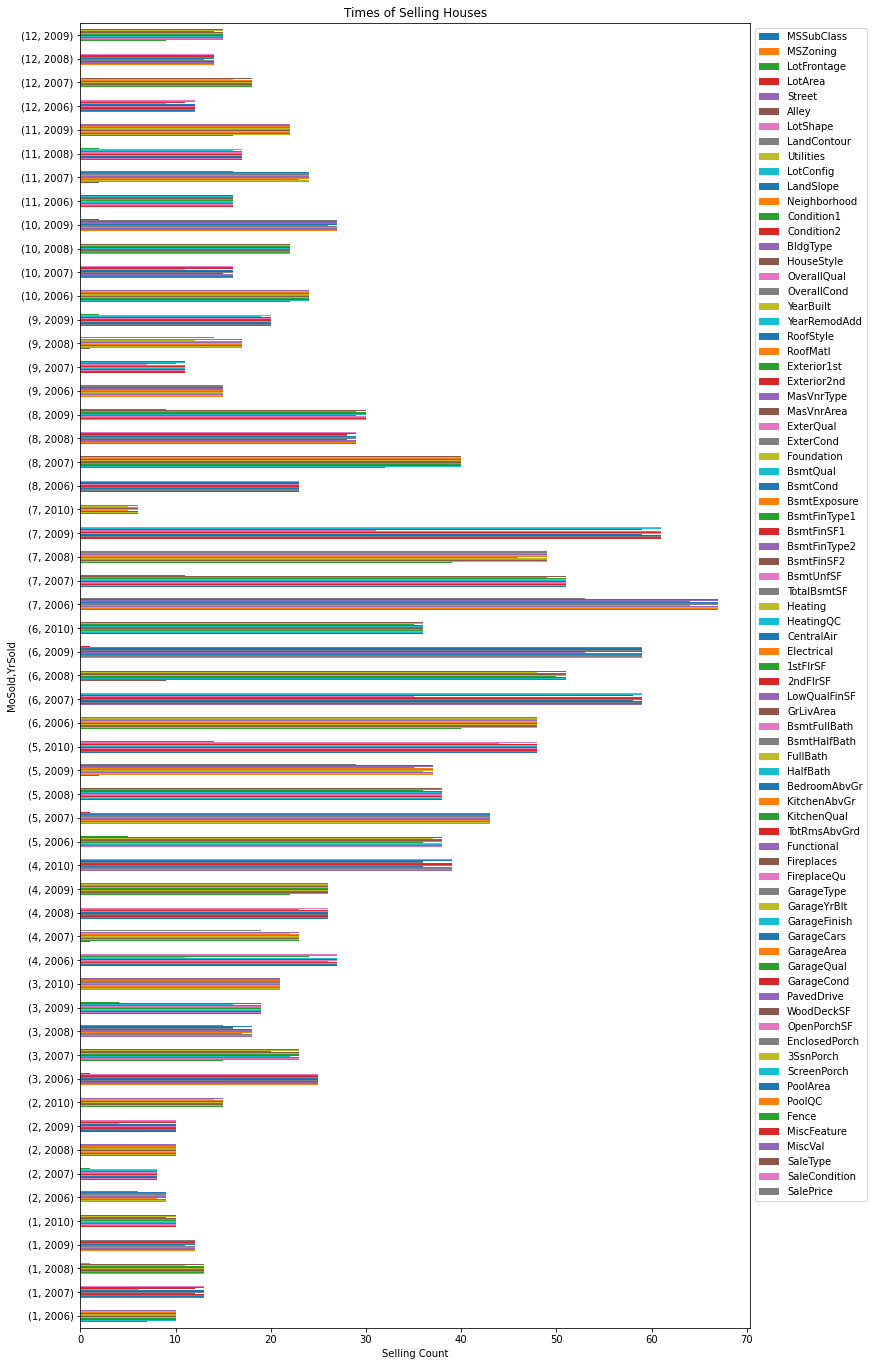

In [23]:
# Grouping data by month and year sold of house to check how the trend has grown over the years

df_comb.groupby(['MoSold','YrSold']).count().plot(kind='barh',figsize=(12,24))
plt.xlabel('Selling Count')
plt.title('Times of Selling Houses')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()



We can observe that every year there is a huge spike in number of houses sold in the month of May, June and July.

The least active months are Junaury, Februrary and Decmeber

In [24]:
# Unique values per categorical column

for col in categorical_features:
    print('{} column has {} unique values'.format(col,df_comb[col].nunique()))

MSZoning column has 5 unique values
Street column has 2 unique values
Alley column has 2 unique values
LotShape column has 4 unique values
LandContour column has 4 unique values
Utilities column has 2 unique values
LotConfig column has 5 unique values
LandSlope column has 3 unique values
Neighborhood column has 25 unique values
Condition1 column has 9 unique values
Condition2 column has 8 unique values
BldgType column has 5 unique values
HouseStyle column has 8 unique values
RoofStyle column has 6 unique values
RoofMatl column has 8 unique values
Exterior1st column has 15 unique values
Exterior2nd column has 16 unique values
MasVnrType column has 4 unique values
ExterQual column has 4 unique values
ExterCond column has 5 unique values
Foundation column has 6 unique values
BsmtQual column has 4 unique values
BsmtCond column has 4 unique values
BsmtExposure column has 4 unique values
BsmtFinType1 column has 6 unique values
BsmtFinType2 column has 6 unique values
Heating column has 6 uniq

In [25]:
# Dropping these coulmns as they dont have affect on sale price

df_comb.drop(['GarageYrBlt','TotRmsAbvGrd','GarageCars'], axis = 1, inplace=True)
numerical_features.drop(['GarageYrBlt','TotRmsAbvGrd','GarageCars'], axis = 1, inplace=True)

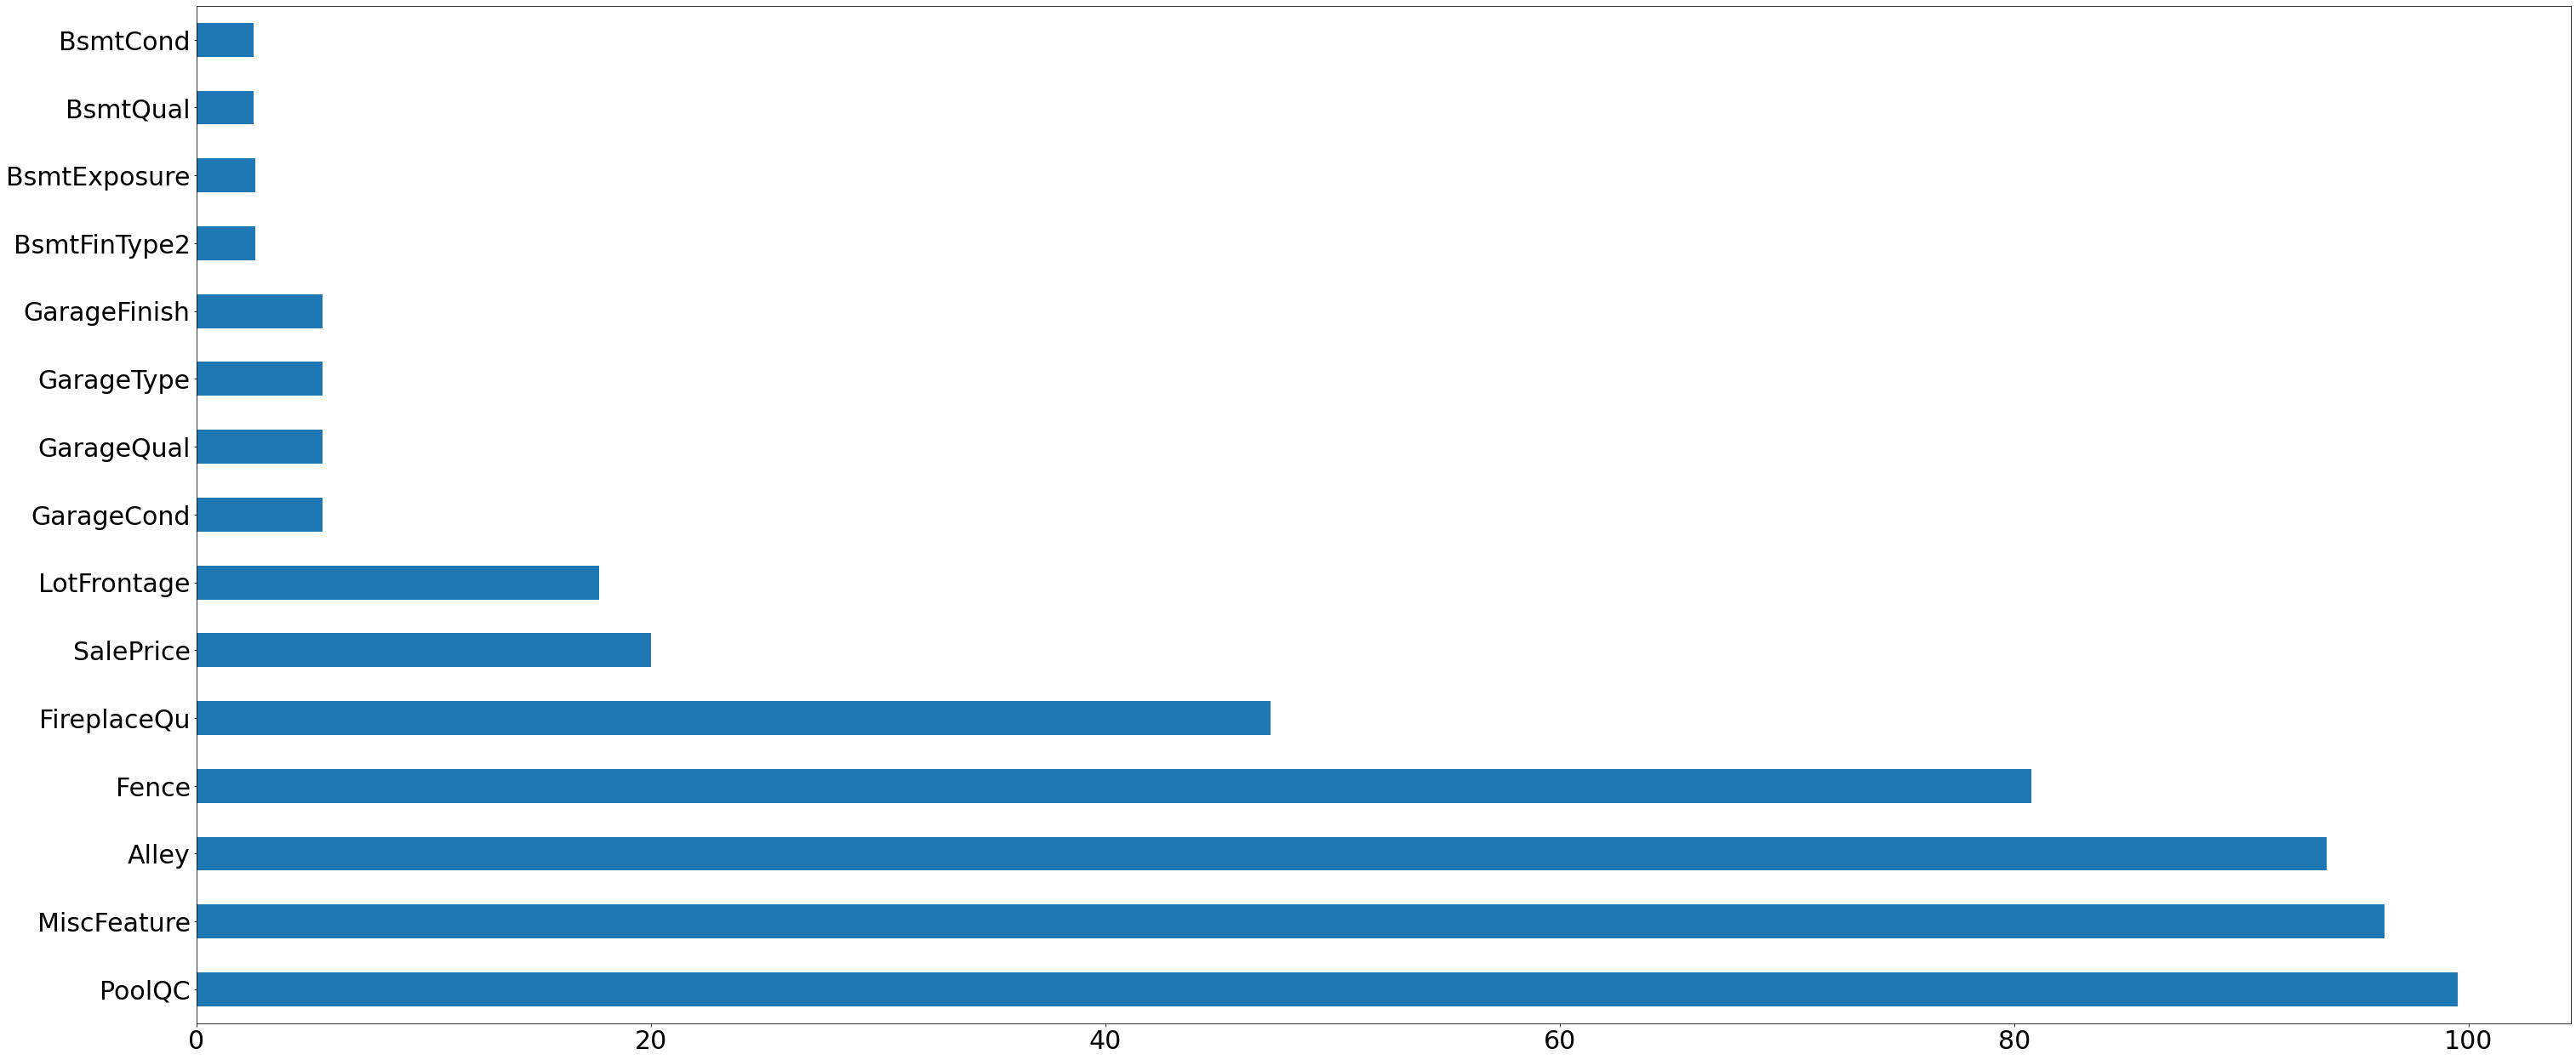

In [26]:
# Checking which coulms have how much missing data

house_null_count = df_comb.isnull().sum()*100/len(df_comb)

miss_house_plot = house_null_count.sort_values(ascending=False).head(15).plot(kind='barh',figsize=(50,22),fontsize=30)

In [27]:
# Chekcing top 10 missing data columns

house_null_count.sort_values(ascending=False)[0:10]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
SalePrice      20.000000
LotFrontage    17.739726
GarageCond      5.547945
GarageQual      5.547945
GarageType      5.547945
dtype: float64

In [28]:
# Dropping columns which have > 45 % missing data

drop_columns_list=df_comb.columns[(house_null_count/100) > .45]
drop_columns_list=list(drop_columns_list)
drop_columns_list

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [29]:
# Drop

df_comb.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis =1 ,inplace = True)

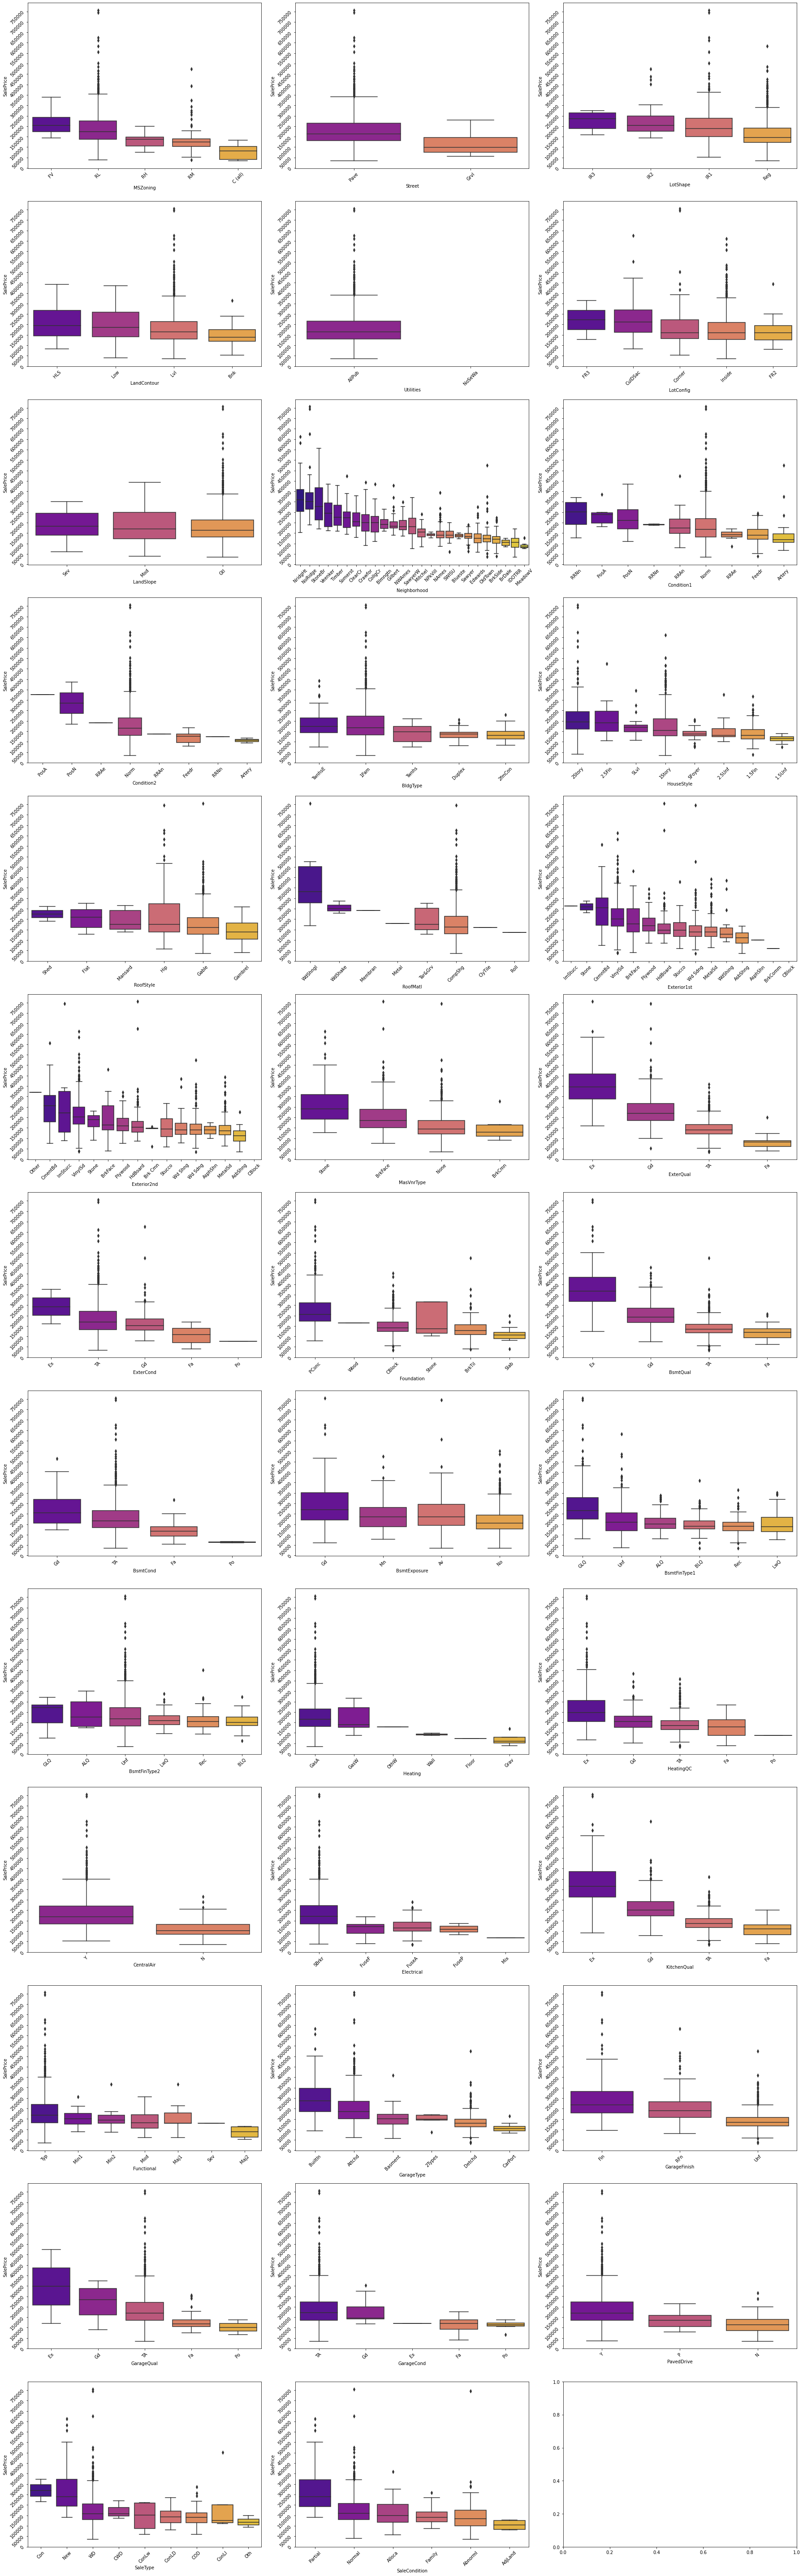

In [30]:
# Box plot of categorical data, in relation with sale price

from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(13, 3, figsize=(25, 80))
axes = axes.flatten()

for i, j in zip(df_comb.select_dtypes(include=['object']).columns, axes):

    sortd = df_comb.groupby([i])['SalePrice'].median().sort_values(ascending=False)
    sns.boxplot(x=i,
                y='SalePrice',
                data=df_comb,
                palette='plasma',
                order=sortd.index,
                ax=j)
    j.tick_params(labelrotation=45)
    j.yaxis.set_major_locator(MaxNLocator(nbins=18))

    plt.tight_layout()

In [31]:
# Box plot of our numerical features

import plotly.express as px
for var in numerical_features:
    fig = px.box(df_comb, var,
                width = 800,height = 350)
    fig.show()

In [32]:
# Checking missing values in numerical data

na_counts = pd.DataFrame(df_comb.isnull().sum().sort_values(ascending = False), columns = ['na_counts'])
na_counts['NA%'] = na_counts['na_counts'].apply(lambda x: x/df_comb.shape[0] * 100).round(2)

na_counts.head(15)

na_counts    NA%
SalePrice           292  20.00
LotFrontage         259  17.74
GarageCond           81   5.55
GarageType           81   5.55
GarageFinish         81   5.55
GarageQual           81   5.55
BsmtExposure         38   2.60
BsmtFinType2         38   2.60
BsmtFinType1         37   2.53
BsmtCond             37   2.53
BsmtQual             37   2.53
MasVnrArea            8   0.55
MasVnrType            8   0.55
Electrical            1   0.07
Utilities             0   0.00

In [33]:
# to sort missing data by type, wither numerical or categorical.

num_list = []
cat_list = []

for var in na_counts.index:
    if na_counts['na_counts'][var] > 0:
        if df_comb[var].dtype != 'object':
            num_list.append(var)
        else:
            cat_list.append(var)
        
print(num_list)
print('\t')
print(cat_list)

['SalePrice', 'LotFrontage', 'MasVnrArea']
	
['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']


### Data imputation

In [34]:
# for ordinal variables
# There are some columns which are ordinal by nature, which represents the quality or condition of certain housing features. 
# In this case, we will map the respective strings to a value. The better the quality, the higher the value

ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}

ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
df_comb[ord_col] = df_comb[ord_col].fillna('NA')

for var in ord_col:
    df_comb[var] = df_comb[var].map(ordinal_map)
    
BsmtFin_col = ['BsmtFinType1','BsmtFinType2']
df_comb[BsmtFin_col] = df_comb[BsmtFin_col].fillna('NA')
for var in BsmtFin_col:
    df_comb[var] = df_comb[var].map(fintype_map)

df_comb['BsmtExposure'] = df_comb['BsmtExposure'].fillna('NA')
df_comb['BsmtExposure'] = df_comb['BsmtExposure'].map(expose_map)

In [35]:
# lot frontage and garage area medians are correlated to neighborhood, so fill their nas using respective medians

df_comb['LotFrontage'] = df_comb.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_comb['GarageArea'] = df_comb.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.median()))

In [36]:
# to fill na using median for the rest of numerical variables

for var in ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]:
    df_comb[var] = df_comb[var].fillna(df_comb[var].median())

In [37]:
na_counts = pd.DataFrame(df_comb.isnull().sum().sort_values(ascending = False), columns = ['na_counts'])
na_counts['NA%'] = na_counts['na_counts'].apply(lambda x: x/df_comb.shape[0] * 100).round(2)

na_counts.head(12)

# We are still missing some data

na_counts    NA%
SalePrice           292  20.00
GarageType           81   5.55
GarageFinish         81   5.55
MasVnrType            8   0.55
Electrical            1   0.07
MasVnrArea            0   0.00
RoofStyle             0   0.00
RoofMatl              0   0.00
Exterior1st           0   0.00
Exterior2nd           0   0.00
ExterQual             0   0.00
YearBuilt             0   0.00

In [38]:
# Checking which coulms still have NA values

num_list = []
cat_list = []

for var in na_counts.index:
    if na_counts['na_counts'][var] > 0:
        if df_comb[var].dtype != 'object':
            num_list.append(var)
        else:
            cat_list.append(var)
        
print(num_list)
print('\t')
print(cat_list)

['SalePrice']
	
['GarageType', 'GarageFinish', 'MasVnrType', 'Electrical']


In [39]:
# for categorical variables

df_comb['GarageFinish'] = df_comb['GarageFinish'].fillna('NA')
df_comb['GarageType'] = df_comb['GarageType'].fillna('NA')
   


In [40]:
# to fill missing values (categorical variables) with mode

cat_col = ['MasVnrType', 'MSZoning', 'Functional', 'Exterior2nd', 'Exterior1st', 'Electrical', 'SaleType']

for var in cat_col:
    df_comb[var] = df_comb[var].fillna(df_comb[var].mode().iloc[0])

In [41]:
na_counts = pd.DataFrame(df_comb.isnull().sum().sort_values(ascending = False), columns = ['na_counts'])
na_counts['NA%'] = na_counts['na_counts'].apply(lambda x: x/df_comb.shape[0] * 100).round(2)

na_counts.head()

# Sale price is missing for the testing data set.

na_counts   NA%
SalePrice            292  20.0
SaleCondition          0   0.0
RoofStyle              0   0.0
RoofMatl               0   0.0
Exterior1st            0   0.0

In [42]:
# Simplifiying some features by adding their subparts together. This step will help with model accuracy.

df_comb['TotalLot'] = df_comb['LotFrontage'] + df_comb['LotArea']
df_comb['TotalBsmtFin'] = df_comb['BsmtFinSF1'] + df_comb['BsmtFinSF2']
df_comb['TotalSF'] = df_comb['TotalBsmtSF'] + df_comb['2ndFlrSF'] + df_comb['1stFlrSF']
df_comb['TotalBath'] = df_comb['FullBath'] + df_comb['HalfBath'] * 0.5 + df_comb['BsmtFullBath'] + df_comb['BsmtHalfBath'] * 0.5
df_comb['TotalPorch'] = df_comb['OpenPorchSF'] + df_comb['EnclosedPorch'] + df_comb['ScreenPorch'] + df_comb['WoodDeckSF']

drop_list = [
    'LotFrontage', 'LotArea',
    'BsmtFinSF1', 'BsmtFinSF2',
    'TotalBsmtSF', '2ndFlrSF','1stFlrSF',
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'
]

df_comb.drop(drop_list,axis=1, inplace=True)

In [43]:
# binary columns

bin_col = ['MasVnrArea','TotalPorch','PoolArea', 'GarageQual', 'BsmtQual']

for var in bin_col:
    col_name = var + '_bin'
    df_comb[col_name] = df_comb[var].apply(lambda x: 1 if x > 0 else 0)

 to build models and have their hyperparams tuned

In [44]:
df_comb = pd.get_dummies(df_comb) # Creatign dummy columns for categorical features

In [45]:
y = df['SalePrice'] # Target variable definition

In [46]:
x = df_comb.loc[df.index].drop(['SalePrice'],axis=1)
y = y.loc[df.index]

# Defining our variables

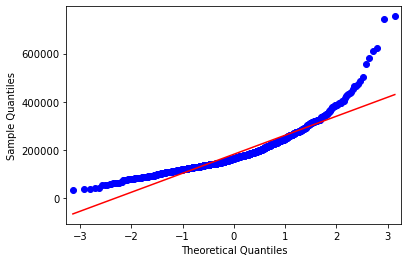

skewness: 1.951
kurtosis: 7.354


In [47]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import boxcox_normmax, skew, kurtosis
qqplot(y,line = 's')
plt.show()

print('skewness: %.3f' % (skew(y)))
print('kurtosis: %.3f' % (kurtosis(y)))

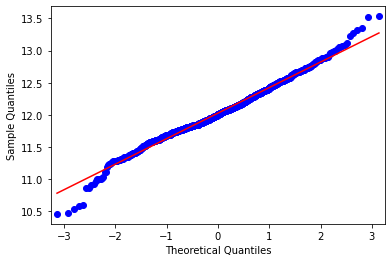

skewness: 0.074
kurtosis: 0.987


In [48]:
# the distribution is terribly off
# it is necessary to make y a bit Gaussian-like

qqplot(np.log1p(y),line = 's')
plt.show()

print('skewness: %.3f' % (skew(np.log1p(y))))
print('kurtosis: %.3f' % (kurtosis(np.log1p(y))))

In [49]:
# not that bad

y = y.apply(lambda x: np.log1p(x)) # Log solves the distributin

### Preparing data for modeling

In [50]:
X = df_comb.loc[df.index].drop(['SalePrice'],axis=1)
y = df['SalePrice']

y = y.loc[df.index]

In [51]:
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import sklearn.metrics as sm

In [52]:
# Diving data in 80/20 split for trainign and testing respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (934, 223)
Y Train Shape  (934,)
X Test Shape  (234, 223)
Y Test Shape  (234,)


### Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.7288930461135743

In [54]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())


0.6946233349271456


In [55]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 28864.67
Mean squared error = 1779561053.36
Median absolute error = 19000.0
Explain variance score = 0.73
R2 score = 0.73


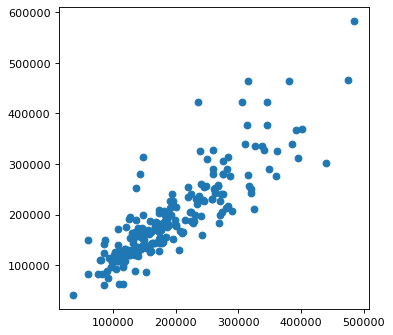

In [56]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,y_pred_dt)

Huge spread

### Random Forest Regressor

In [57]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.8793228787674123

In [58]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.8424403586028616


In [59]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 19050.39
Mean squared error = 792131304.27
Median absolute error = 13370.5
Explain variance score = 0.88
R2 score = 0.88


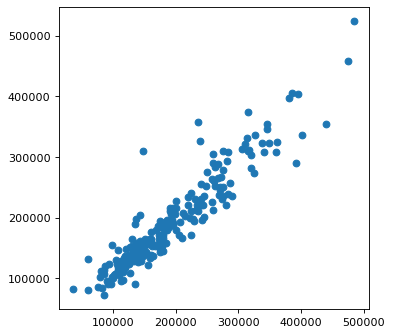

In [60]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,y_pred_rfr)

Decent spread but values are still scattered a lot

### Lasso Regression

In [61]:
from sklearn import linear_model
lassoReg = linear_model.Lasso(alpha=0.1).fit(X_train,y_train)
y_pred_lasso = lassoReg.predict(X_test)
lassoReg.score(X_test,y_test)

0.8558304349610636

In [62]:
scr = cross_val_score(lassoReg, X,y, cv=5)
print(scr.mean())

0.7979685336290905


In [63]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lasso), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lasso), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lasso), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lasso), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lasso), 2))

Mean absolute error = 21373.51
Mean squared error = 946337005.91
Median absolute error = 15125.05
Explain variance score = 0.86
R2 score = 0.86


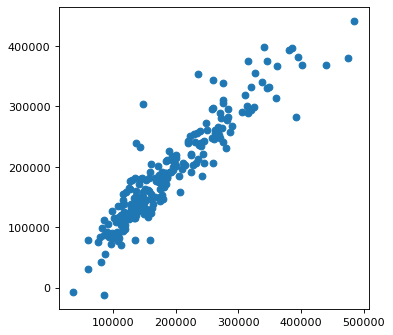

In [64]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,y_pred_lasso)

Skewed result

### Support vector regression

In [65]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

-0.10249710264490175

In [66]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

-0.0603138028041168


In [67]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_svr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_svr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_svr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_svr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_svr), 2))

Mean absolute error = 62435.41
Mean squared error = 7236852014.26
Median absolute error = 45956.44
Explain variance score = 0.0
R2 score = -0.1


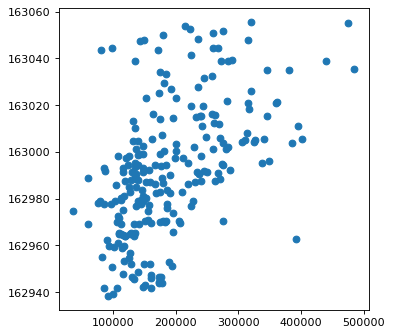

In [68]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,y_pred_svr)

Totally random distribution 

### Linear Regression

In [69]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.8297321303458922

In [70]:

cr = cross_val_score(lr, X_train,y_train, cv=5)
print(scr.mean())

-0.0603138028041168


In [71]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_lr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_lr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_lr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_lr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_lr), 2))

Mean absolute error = 22242.31
Mean squared error = 1117647722.17
Median absolute error = 15164.24
Explain variance score = 0.83
R2 score = 0.83


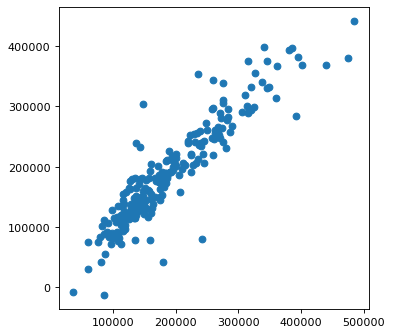

In [72]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,y_pred_lr)

This result is also slightly skewed

### XGB Regressor

In [73]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_test,y_test)

0.8898079272441822

In [74]:
cr = cross_val_score(xgb, X_train,y_train, cv=5)
print(scr.mean())

-0.0603138028041168


In [75]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_xgb), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_xgb), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_xgb), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_xgb), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_xgb), 2))

Mean absolute error = 18543.73
Mean squared error = 723306865.63
Median absolute error = 13697.06
Explain variance score = 0.89
R2 score = 0.89


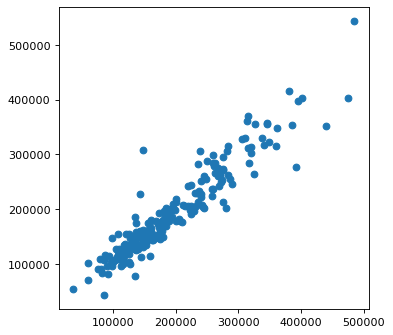

In [76]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,y_pred_xgb)

This seems like the most accurate result; I'll proceed to tune the hyperparameters for this

### Hyper paramter tuning

Hyper parameter tunign will be performed on the XGB Regressor as itr gave the best results.

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {                  'learning_rate' : [0.1,0.12,0.15],
                                   'max_depth' : [4,5,6,7],
                                   'min_child_weight' : [8,10],
                                   'subsample' : [0.5,0.7,0.9],
                                   'colsample_bytree': [0.5,1],
                                   'reg_lambda' : [0.5,1],
                                   'gamma' : [0.001,0.005],
                                   'reg_alpha' : [0.001,0.0005],
                                   'n_estimators' : [100,150,200]
             }

In [79]:
GCV = GridSearchCV(XGBRegressor(),parameters,cv=5)

In [80]:
GCV.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=XGBRegressor(),
param_grid={'learning_rate' : [0.1,0.12,0.15],
                      'max_depth' : [4,5,6,7],
                  'min_child_weight' : [8,10],
                  'subsample' : [0.5,0.7,0.9],
                  'colsample_bytree': [0.5,1],
                       'reg_lambda' : [0.5,1],
                      'gamma' : [0.001,0.005],
                 'reg_alpha' : [0.001,0.0005],
              'n_estimators' : [100,150,200]})



In [81]:
GCV.best_params_ # These are the best parameters


{'learning_rate' : 0.1,
'max_depth' : 6,
'min_child_weight' : 10,
'subsample' : 0.7,
'colsample_bytree': 1,
'reg_lambda' : 1,
'gamma' : 0.005,
'reg_alpha' : 0.0005,
'n_estimators' : 200}



In [82]:
mod =XGBRegressor(learning_rate = 0.1,
                                   max_depth = 6,
                                   min_child_weight = 10,
                                   subsample = 0.7,
                                   colsample_bytree= 1,
                                   reg_lambda = 1,
                                   gamma = 0.005,
                                   reg_alpha = 0.0005,
                                   n_estimators = 200)
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.8897064915927868

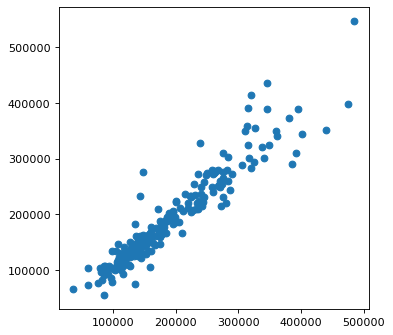

In [83]:
plt.figure(figsize=(5, 5), dpi = 80)
plt.scatter(y_test,pred)

#### We can observer a much tighter fit after hyper parameter tuning

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

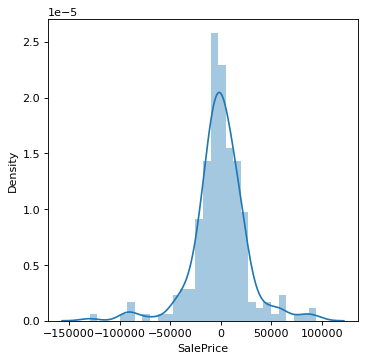

In [84]:
plt.figure(figsize=(5, 5), dpi = 80)
sns.distplot(y_test-pred)

### Saving the model

In [85]:
import joblib
joblib.dump(mod,"HousingPrice.pkl")

['HousingPrice.pkl']

### Predictions on the testing data

In [86]:
testing = df_comb.loc[df_test.index].drop(['SalePrice'],axis=1)

In [87]:
final_pred = mod.predict(testing)

(array([ 5., 19., 30., 48., 54., 27., 39., 14., 14., 11.,  8.,  5.,  3.,
         4.,  2.,  2.,  1.,  5.,  0.,  1.]),
 array([ 51151.74,  73633.77,  96115.81, 118597.85, 141079.89, 163561.92,
        186043.95, 208526.  , 231008.03, 253490.06, 275972.1 , 298454.12,
        320936.2 , 343418.22, 365900.25, 388382.28, 410864.3 , 433346.34,
        455828.4 , 478310.44, 500792.47], dtype=float32),
 <BarContainer object of 20 artists>)

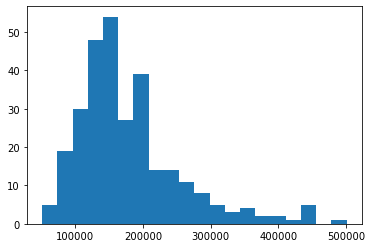

In [88]:
plt.hist(final_pred, bins=20)

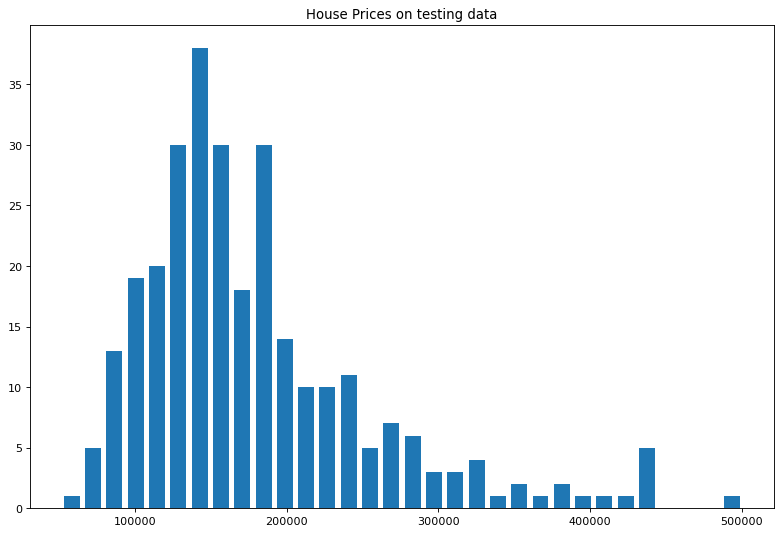

In [89]:
plt.figure(figsize=(12, 8), dpi = 80)
plt.hist(final_pred, bins= 32,rwidth = 0.75)
plt.title('House Prices on testing data')
plt.show()

Now comparing this plot to the data we got from trainign we can see all the similarities.

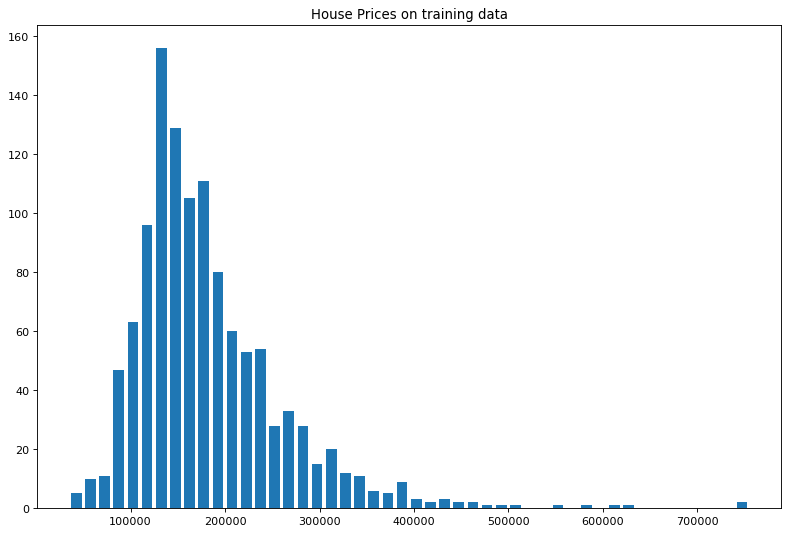

In [90]:
plt.figure(figsize=(12, 8), dpi = 80)
plt.hist(df['SalePrice'],bins=48,rwidth = 0.75)
plt.title('House Prices on training data')
plt.show()

##### We can observer that our results even on limited trainign data match pretty well with the expected results, we can even observe the minor features like two peaks in the distribution and the skewness to the right.

With this we can conclused our model was accurate and can be used to predict house prices.